<a href="https://colab.research.google.com/github/tanishkabajaj/Deep_Learning/blob/main/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 49ms/step - accuracy: 0.9134 - loss: 0.2809 - val_accuracy: 0.9840 - val_loss: 0.0558 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 48ms/step - accuracy: 0.9808 - loss: 0.0681 - val_accuracy: 0.9903 - val_loss: 0.0342 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 51ms/step - accuracy: 0.9852 - loss: 0.0514 - val_accuracy: 0.9899 - val_loss: 0.0333 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 51ms/step - accuracy: 0.9878 - loss: 0.0425 - val_accuracy: 0.9912 - val_loss: 0.0343 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - a

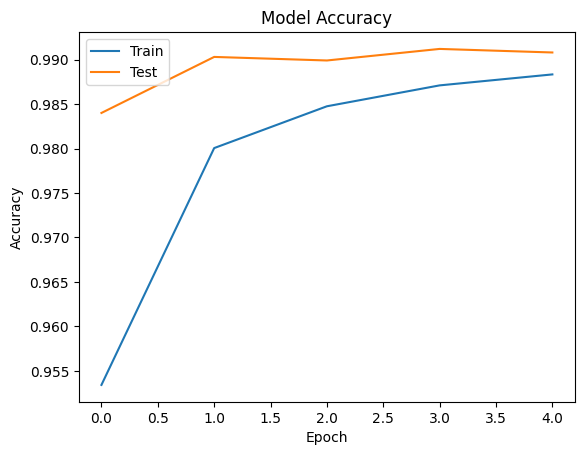

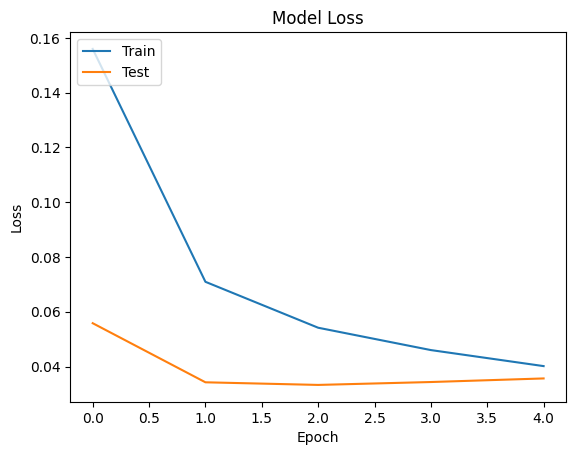

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


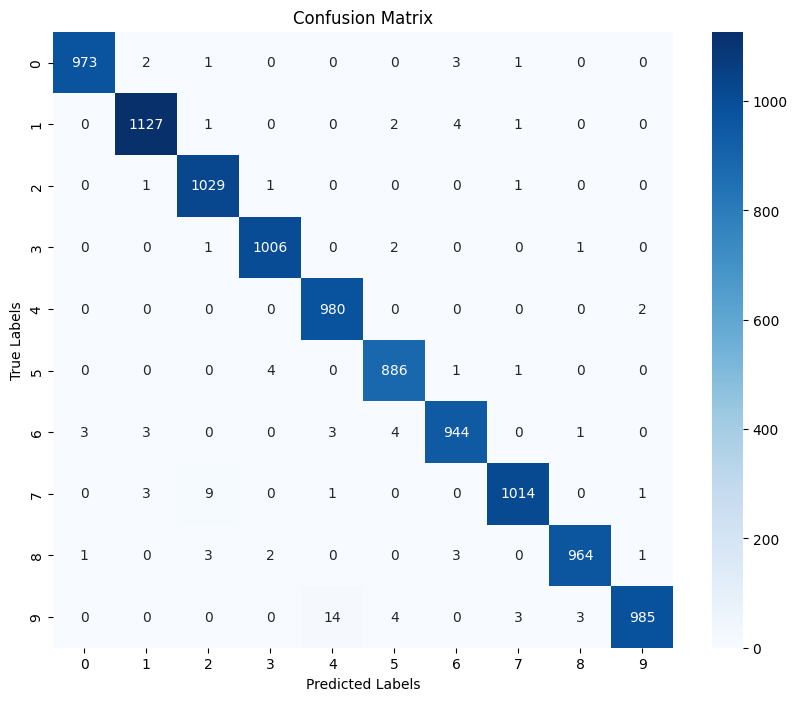

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


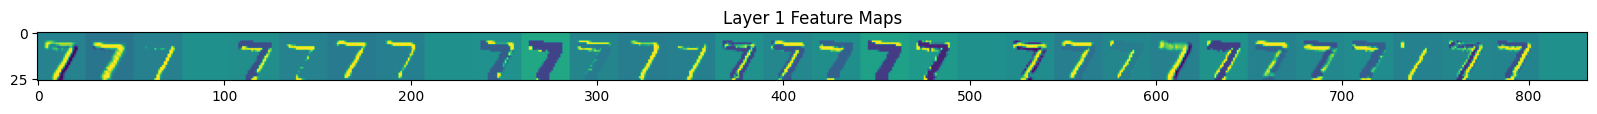

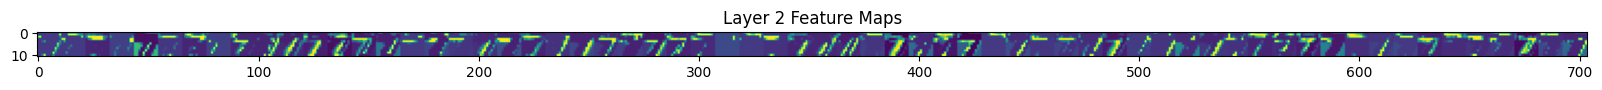

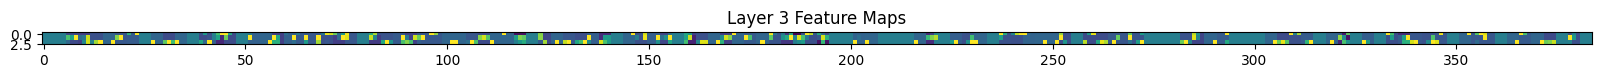

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess the MNIST dataset
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()
train_imgs = train_imgs.reshape((train_imgs.shape[0], 28, 28, 1)).astype('float32') / 255
test_imgs = test_imgs.reshape((test_imgs.shape[0], 28, 28, 1)).astype('float32') / 255

# Model creation with Batch Normalization and Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Learning rate scheduler callback
lr_schedule = callbacks.LearningRateScheduler(lambda epoch: 0.001 * (0.5 ** (epoch // 5)), verbose=1)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist = model.fit(train_imgs, train_labels, epochs=5,
                 validation_data=(test_imgs, test_labels),
                 callbacks=[lr_schedule])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(f'Test Accuracy: {test_acc}')

# Plot accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion Matrix
pred_labels = np.argmax(model.predict(test_imgs), axis=1)
conf_matrix = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualize Feature Maps
def visualize_feature_maps(model, image):
    # Get outputs of each Conv2D layer
    conv_layers = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
    feature_map_model = models.Model(inputs=model.inputs, outputs=conv_layers)

    # Generate feature maps
    feature_maps = feature_map_model.predict(image.reshape(1, 28, 28, 1))

    for i, fmap in enumerate(feature_maps):
        num_filters = fmap.shape[-1]
        size = fmap.shape[1]
        display_grid = np.zeros((size, size * num_filters))

        for j in range(num_filters):
            x = fmap[0, :, :, j]
            x -= x.mean()
            x /= x.std() + 1e-5
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, j * size : (j + 1) * size] = x

        scale = 20. / num_filters
        plt.figure(figsize=(scale * num_filters, scale))
        plt.title(f'Layer {i+1} Feature Maps')
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()

# Visualize feature maps for a test image
visualize_feature_maps(model, test_imgs[0])



















